# Importing important modules and functions

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [154]:
import plotly.express as px
import plotly.graph_objects as go

# Loading the dataset into notebbook

In [155]:
ds = pd.read_csv("happiness report.csv") # Reading the given data and making a dataframe
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


From the above dataset, we get the info that there are 158 rows and 12 columns. Out of these columns, Country, Region and Happiness Rank are the columns which help us in identifying the specific ranking of a particular country on the world's happiness index for the given year. While the analysing of the dataset, these columns can be removed as it doesnot effect the Happiness Score for a country.

In [156]:
# Here we are making the data frame for the analysing purpose.
df = ds.loc[:, 'Happiness Score' : 'Dystopia Residual']
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [157]:
df.dtypes # Checking all the data types of the data.

Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Now, for the analysing part we drop the standard error column as we will perform the mertics for our model ourselves.

In [158]:
df.drop(['Standard Error'], axis = 1, inplace = True) # Dropping standard error column.

In [159]:
df.info() # checking for the imformation about the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Economy (GDP per Capita)       158 non-null    float64
 2   Family                         158 non-null    float64
 3   Health (Life Expectancy)       158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
 7   Dystopia Residual              158 non-null    float64
dtypes: float64(8)
memory usage: 10.0 KB


From the above information we get to know that:
    
    1 All the values are in float datatype. So we donot need to use Standard Scaling in this dattaset.
    2 there are no null values in the dataframe. It can also be visualised using the isnull() function.

<AxesSubplot:>

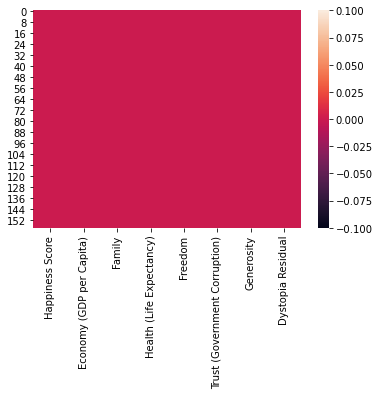

In [160]:
sns.heatmap(df.isnull()) # There are no null values in the dataset.

# Moving ahead with descriptive statistics

Now we perform some descriptive statistics on the dataframe to draw some insights.

In [161]:
df.describe() # Performing descriptive statistics on the data.

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From the above statistics, we can get some information about the data frame.
    
    1 The standard deviation is not very large in the dataset, only Happiness core has a standard deviation which is greater than 1.
    2 The difference between mean and median is not large in the dataframe. It means that the data is not skewed.
    3 The change in 75th percentile and maximum value is not large. So outliers may not be present in the data. We will also 
    visualise presence of outliers.

# EDA

In [162]:
px.box(df, notched = True, title = 'Outliers') # Plotting a box plot using plotly module.

From the above plot, we can see that there are some outliers present in the dataset. We will check that how much data is affected by removing these outliers from the data.

In [163]:
from scipy.stats import zscore
df_zs = np.abs(zscore(df))
df_zs

array([[1.93736005, 1.36962124, 1.32028142, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 1.13522625, 1.51445776, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 1.19286069, 1.36105403, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.45524543, 1.90108634, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.06756644, 2.1184666 , ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.58633379, 3.13472485, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

Adding the label or target column in the dataset.

In [164]:
loc = np.where(df_zs > 3)
loc

(array([ 27, 128, 147, 153, 155, 157], dtype=int64),
 array([5, 6, 2, 5, 7, 2], dtype=int64))

In [165]:
df_new = df[(df_zs < 3).all(axis = 1)]
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


As we can see that 6 rows have been dropped, so, the rows with outliers have been removed.

Now we check the if any skewness is present in the data or not both numerically and visually.

In [166]:
df_new.skew() # Skewness of the dataset

Happiness Score                  0.165587
Economy (GDP per Capita)        -0.401110
Family                          -0.815356
Health (Life Expectancy)        -0.733453
Freedom                         -0.406211
Trust (Government Corruption)    1.287270
Generosity                       0.646579
Dystopia Residual               -0.045578
dtype: float64

In [167]:
clist = df_new.columns.values
clist

array(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
      dtype=object)

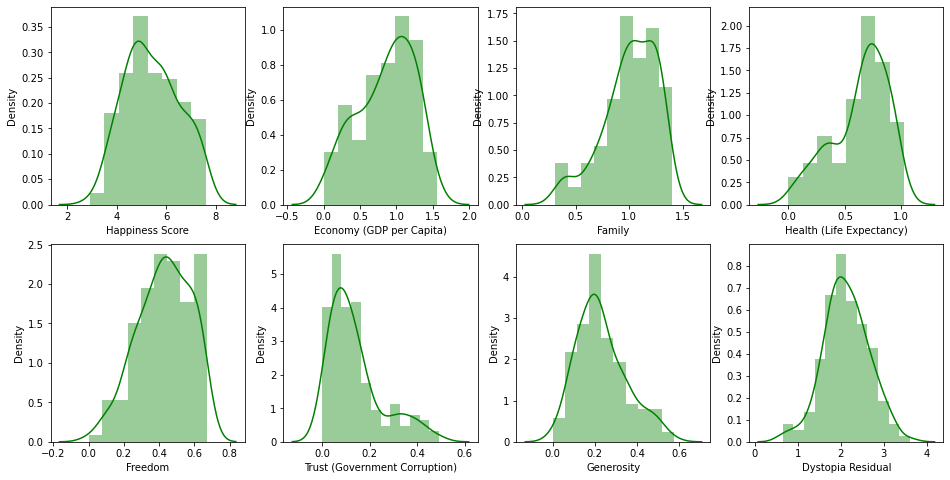

In [168]:
plt.figure(figsize = (16, 8))
for i in range(0, len(clist)):
    plt.subplot(2, 4, i + 1)
    sns.distplot(df_new[clist[i]], color = "green") # Visual representation of skewness in the data.

As we can see from the visual plot that a very little skewness is present in the data, so it can be neglected.

Now, we check the correlation between different columns of the dataset. This will give us the relationship between the columns.

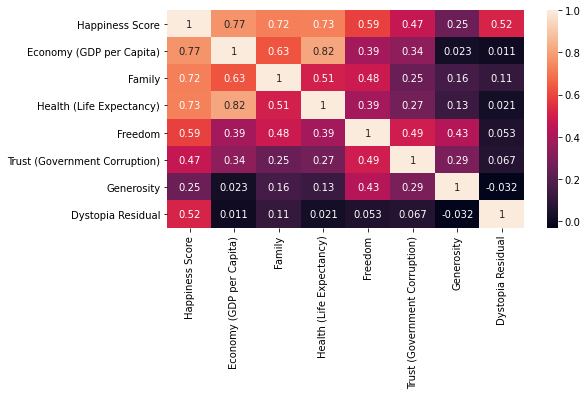

In [169]:
plt.figure(figsize = (8, 4))
fig = sns.heatmap(df_new.corr(), annot = True)

From the above correlation heatmap, we get so insights on the data.
    
    1 Happiness score is highly related to Economy, Family, and Health.
    2 It is least related to Generosity, and Government Trust.

Now that the data is cleaned and we have performed EDA, it can be used for the training to fit the model.

# Building the Regression Model

We will use the linear regression model to train and test the model.

In [170]:
from sklearn.linear_model import LinearRegression # to perform the linear regression on the train and test data 
from sklearn.metrics import mean_squared_error # to find out the error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Now, we split the testing and training data.

In [171]:
df_new

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [172]:
y = df_new['Happiness Score']
x = df_new.loc[:, "Economy (GDP per Capita)" : "Dystopia Residual"]

Now we split the training and the testing data.

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

We have splitted the data. Fitting the train and test data into the Linear Regression Model so that we can predict the target values.

In [174]:
lr = LinearRegression() # Making an instance of the LR Algorithm.
lr.fit(x_train, y_train)

LinearRegression()

# Checking the score of the Regression Model

In [175]:
lr.score(x_train, y_train) 

0.9999999393103818

The Regression model is now fitted properly with the score of 99%. We will now use this model to predict the target values using the x_test which is testing split data.

In [176]:
prediction = lr.predict(x_test)

We can finally compare the predicted values and the actual values with each other to check how well is the model performing.

In [177]:
print("The mean absolute error of the fitted model is", mean_absolute_error(y_test, prediction))
print("The mean squared error of the fitted model is", mean_squared_error(y_test, prediction))
print("The root mean squared error of the fitted model is", np.sqrt(mean_squared_error(y_test, prediction)))

The mean absolute error of the fitted model is 0.000270004516108581
The mean squared error of the fitted model is 9.960852930144816e-08
The root mean squared error of the fitted model is 0.00031560818953482207


Calculating the R2 score of the fitted model.

In [178]:
from sklearn.metrics import r2_score
print("The r2 score of the fitted model is", r2_score(y_test, prediction))

The r2 score of the fitted model is 0.9999999222719503


Now, we have checked the Regression Model using the metrics and calculated all the values. We can use serialisation to store the model and use it for the prediction purpose.

# Serialisation

In this step, we will save the Regression Model so that it can be used for the prediction of the Happiness Score of a country based factors which are Economy, Family, Health, Freedom, Government Trust, Generosity and Dystopian Residual. We just need to put in the values in the model and the happiness score of the country will be predicted.

In [179]:
import joblib # Joblib module is used for serialisation

In [180]:
# Dumping the model as an object file so that it can be used outside the notebook.
joblib.dump(lr, 'Linear Regression Model.obj')

['Linear Regression Model.obj']